# Capstone 2: Nuclear feature extraction for breast tumor diagnosis
# Data Wrangling

In [34]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Adding headers
cols = ['ID','Diagnosis','radius','texture','perimeter','area','smoothness','compactness','concavity',
        'concave_points','symmetry','fractal_dimension','radius_stde','texture_stde','perimeter_stde','area_stde',
        'smoothness_stde','compactness_stde','concavity_stde','concave_points_stde','symmetry_stde',
        'fractal_dimension_stde','radius_ext','texture_ext','perimeter_ext','area_ext',
        'smoothness_ext','compactness_ext','concavity_ext','concave_points_ext','symmetry_ext','fractal_dimension_ext']

In [3]:
# Data
df = pd.read_table('wdbc.data',sep=',',names = cols)
df.shape

(569, 32)

In [4]:
pd.set_option('display.max_columns', 32)
df.head()

,ID,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,radius_stde,texture_stde,perimeter_stde,area_stde,smoothness_stde,compactness_stde,concavity_stde,concave_points_stde,symmetry_stde,fractal_dimension_stde,radius_ext,texture_ext,perimeter_ext,area_ext,smoothness_ext,compactness_ext,concavity_ext,concave_points_ext,symmetry_ext,fractal_dimension_ext
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.Diagnosis.value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

Target (Diagnosis) is categorical, all other features appear to be continuous. Balanced set of M and B diagnoses.

In [32]:
df_mean_ext.isna().sum() # No null values

Diagnosis                0
radius                   0
texture                  0
perimeter                0
area                     0
smoothness               0
compactness              0
concavity                0
concave_points           0
symmetry                 0
fractal_dimension        0
radius_ext               0
texture_ext              0
perimeter_ext            0
area_ext                 0
smoothness_ext           0
compactness_ext          0
concavity_ext            0
concave_points_ext       0
symmetry_ext             0
fractal_dimension_ext    0
dtype: int64

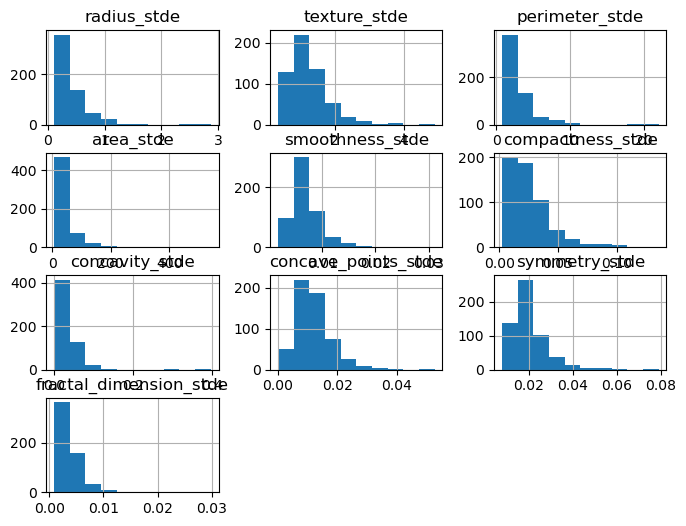

In [27]:
# Drop stde?
stde_cols = ['radius_stde','texture_stde','perimeter_stde','area_stde','smoothness_stde','compactness_stde',
             'concavity_stde','concave_points_stde','symmetry_stde','fractal_dimension_stde']
df[stde_cols].hist(figsize=(8,6))
plt.show()

Standard errors all seem low/left skewed. Dropping for now, may need later for assessing model accuracy.

In [21]:
stde_df = df[['radius_stde', 'texture_stde', 'perimeter_stde',
       'area_stde', 'smoothness_stde', 'compactness_stde', 'concavity_stde',
       'concave_points_stde', 'symmetry_stde', 'fractal_dimension_stde']]

df_mean_ext = df.drop(columns=['radius_stde', 'texture_stde', 'perimeter_stde',
       'area_stde', 'smoothness_stde', 'compactness_stde', 'concavity_stde',
       'concave_points_stde', 'symmetry_stde', 'fractal_dimension_stde'])
df_mean_ext.columns

Index(['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry',
       'fractal_dimension', 'radius_ext', 'texture_ext', 'perimeter_ext',
       'area_ext', 'smoothness_ext', 'compactness_ext', 'concavity_ext',
       'concave_points_ext', 'symmetry_ext', 'fractal_dimension_ext'],
      dtype='object')

In [30]:
# Setting ID as index
df_mean_ext.set_index('ID',inplace=True)
df_mean_ext.head() 

,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,radius_ext,texture_ext,perimeter_ext,area_ext,smoothness_ext,compactness_ext,concavity_ext,concave_points_ext,symmetry_ext,fractal_dimension_ext
ID,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
# Converting M/B values in Diagnosis to bool
df_boold = df_mean_ext
df_boold['Diagnosis'] = df_boold['Diagnosis'].replace({'M':True, 'B':False})
df_boold.head()

,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,radius_ext,texture_ext,perimeter_ext,area_ext,smoothness_ext,compactness_ext,concavity_ext,concave_points_ext,symmetry_ext,fractal_dimension_ext
ID,,,,,,,,,,,,,,,,,,,,,
842302,True,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,True,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,True,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,True,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
# Saving
cwd = os.getcwd()
path = cwd + "/cleaned_data"
df_boold.to_csv(path)